In [1]:
!pip install tensorflow
!pip install matplotlib
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.layers
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import PIL.Image as Image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_curve
)

In [2]:
def set_random_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
set_random_seeds(42)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/MyDrive/Dataset.zip

Mounted at /content/gdrive
Archive:  gdrive/MyDrive/Dataset.zip
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpeg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).png  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (10).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (11).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (116).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (117).jpg  
  inflating: Freshwater Fish Disease Aquaculture in south asia/Test/Bacteri

In [4]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Freshwater Fish Disease Aquaculture in south asia/Train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1747 files belonging to 7 classes.


In [6]:
class_names=dataset.class_names
class_names

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

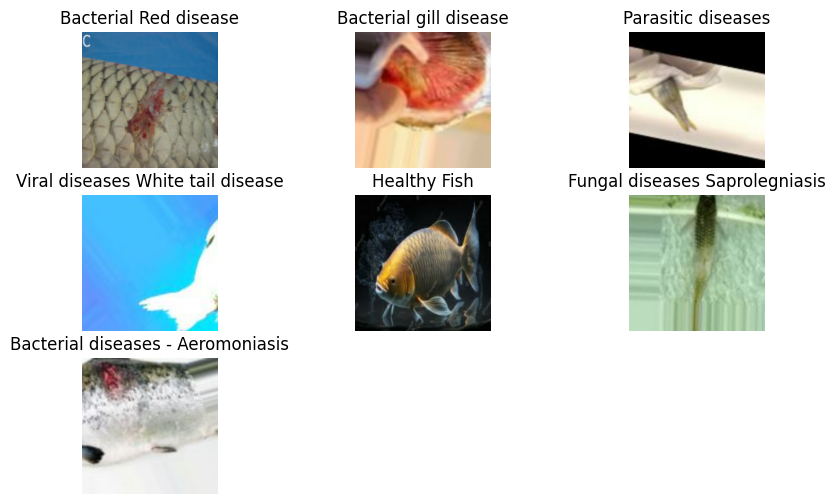

In [7]:
displayed_classes = {}
plt.figure(figsize=(10,6))

for image_batch, label_batch in dataset.take(1):
    i = 0
    for img, label in zip(image_batch, label_batch):
        class_label = label.numpy()

        if class_label not in displayed_classes:
            displayed_classes[class_label] = True
            plt.subplot(3, 3, i + 1)
            plt.imshow(img.numpy().astype("uint8"))
            plt.axis("off")
            plt.title(class_names[class_label])
            i += 1

        if i >= 7:
            break

plt.show()


In [8]:
TRAIN_SIZE, VALIDATION_SIZE= 0.9, 0.1
train_batch = int(len(dataset) * TRAIN_SIZE)
train_imgs = dataset.take(train_batch)
val_batch = int(len(dataset) * VALIDATION_SIZE)
valid_imgs = dataset.skip(train_batch).take(val_batch)

In [9]:
print("Number of Images in Training Dataset {}".format(train_batch*BATCH_SIZE))
print("Number of Images in Validation Dataset {}".format(val_batch*BATCH_SIZE))

Number of Images in Training Dataset 1568
Number of Images in Validation Dataset 160


In [10]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation=tf.keras.Sequential([
    layers.RandomRotation(0.20)
])
train_imgs=train_imgs.map(lambda x,y:(data_augmentation(x,training=True),y)).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3))
base_model.trainable=False
model = tf.keras.Sequential(
    [base_model,
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(384,activation='relu'),
     tf.keras.layers.Dense(7, activation='softmax')]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
callback = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model.keras')
]
history=model.fit(train_imgs, validation_data=valid_imgs, epochs=25,callbacks = callback,batch_size = BATCH_SIZE,verbose=1)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 741ms/step - accuracy: 0.2750 - loss: 46.0388 - val_accuracy: 0.4875 - val_loss: 1.3629
Epoch 2/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 60s 425ms/step - accuracy: 0.5880 - loss: 1.0794 - val_accuracy: 0.6625 - val_loss: 1.0053
Epoch 3/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 485ms/step - accuracy: 0.7289 - loss: 0.7866 - val_accuracy: 0.7875 - val_loss: 0.6991
Epoch 4/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 442ms/step - accuracy: 0.8272 - loss: 0.5252 - val_accuracy: 0.8125 - val_loss: 0.7043
Epoch 5/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 469ms/step - accuracy: 0.8300 - loss: 0.4703 - val_accuracy: 0.9000 - val_loss: 0.5418
Epoch 6/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 413ms/step - accuracy: 0.8425 - loss: 0.4562 - val_accuracy: 0.8875 - val_loss: 0.4401
Epoch 7/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 463ms/step - accuracy: 0.8987 - loss: 0.3189 - val_accuracy: 0.8625 - val_loss: 0.4791
Epoch 8/25
49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 543

In [13]:
model.save('model.keras')

In [14]:
test_imgs=tf.keras.preprocessing.image_dataset_from_directory(
    "Freshwater Fish Disease Aquaculture in south asia/Test",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 697 files belonging to 7 classes.


In [15]:
all_predictions=[]
all_labels=[]
for images,labels in test_imgs:
  predictions=model.predict(images)
  predicted_classes=np.argmax(predictions,axis=1)
  all_predictions.extend(predicted_classes)
  all_labels.extend(labels.numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [16]:
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)
print("Recall: ", recall)
print("Precision: ", precision)

Accuracy:  0.9842180774748924
F1 Score:  0.9842251177079003
Recall:  0.9842180774748924
Precision:  0.9843171043444808


In [17]:
confusion_matrix(all_labels,all_predictions)

array([[ 99,   0,   0,   0,   0,   1,   0],
       [  0,  99,   0,   0,   0,   1,   0],
       [  0,   0,  98,   0,   1,   1,   0],
       [  0,   0,   0,  97,   1,   0,   2],
       [  0,   0,   0,   0, 100,   0,   0],
       [  0,   1,   0,   0,   0,  98,   1],
       [  0,   0,   1,   1,   0,   0,  95]])

In [18]:
model = load_model('model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


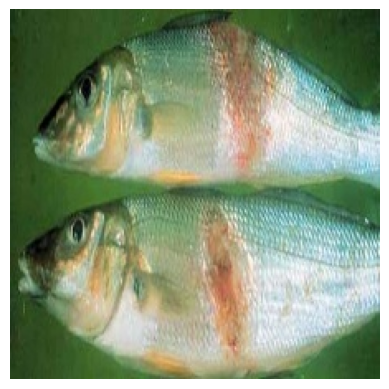

Predicted class: Bacterial Red disease
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


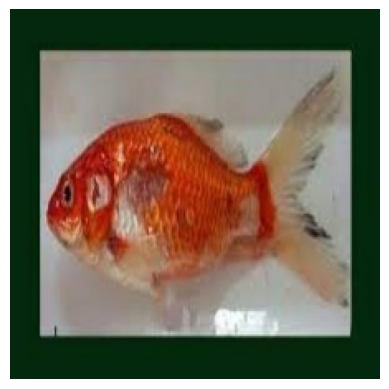

Predicted class: Bacterial diseases - Aeromoniasis


In [20]:
def sample_predict(model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    try:
        predicted_class = class_names[predicted_class_index]
    except NameError:
        raise NameError("Please define `class_names` as a list of class labels before calling this function.")
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Predicted class:", predicted_class)

# Run prediction
sample_predict(model, "/content/Bacterial Red disease (2).jpg")
sample_predict(model, "/content/Bacterial diseases - Aeromoniasis (3).jpeg")

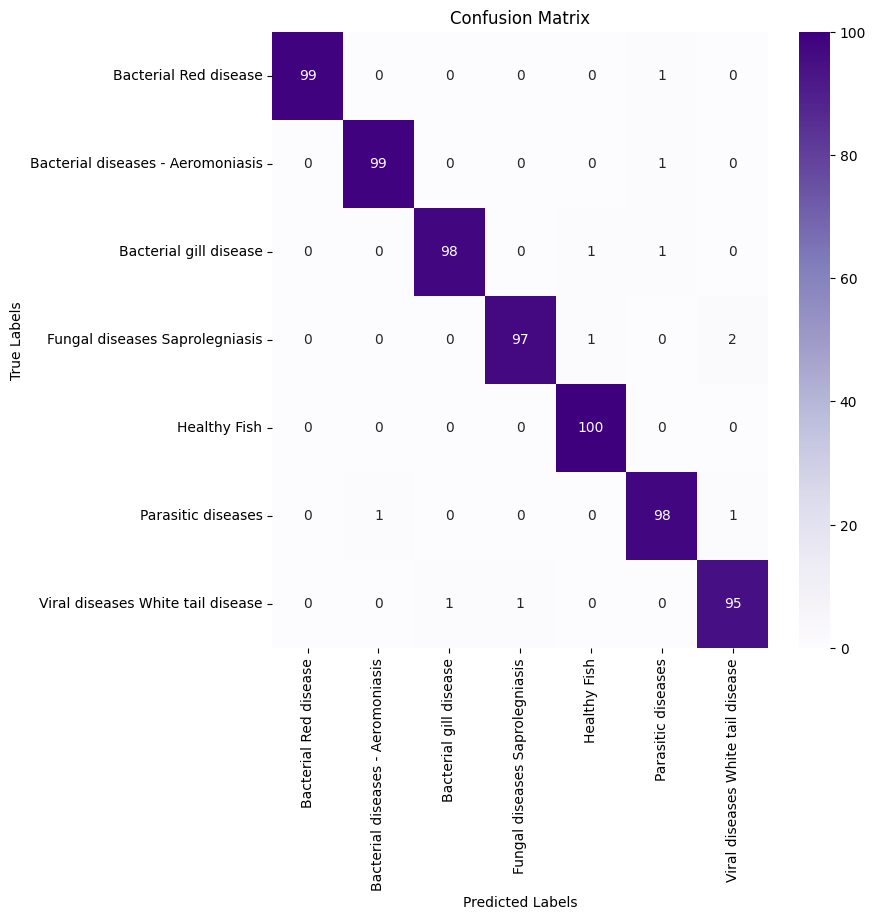

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(all_labels,all_predictions),annot=True,fmt="d",cmap="Purples",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

Text(0.5, 1.0, 'Training and Validation Loss')

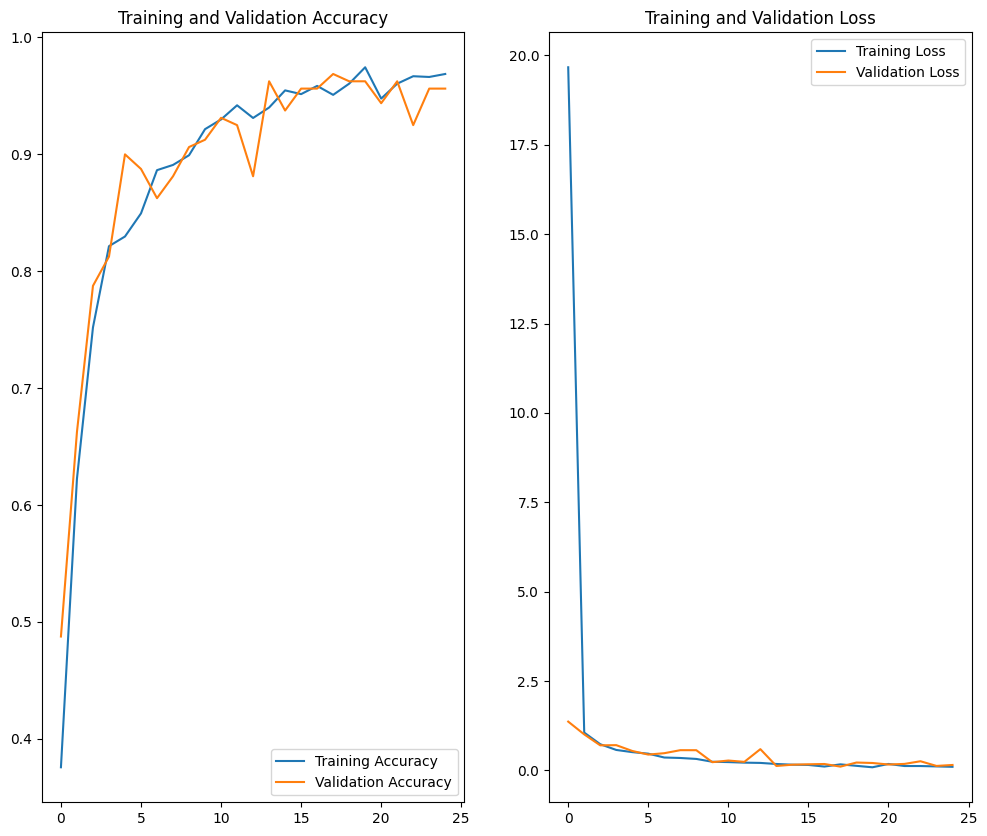

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(range(25), acc, label='Training Accuracy')
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(25), loss, label='Training Loss')
plt.plot(range(25), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
